# Project 4: Data Visualization

## Data Cleaning

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('./HR-Employee-Attrition.csv')
data_attrition = data.copy()
data_attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
def check_nulls():
    return data_attrition.isnull().mean() * 100
check_nulls()

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

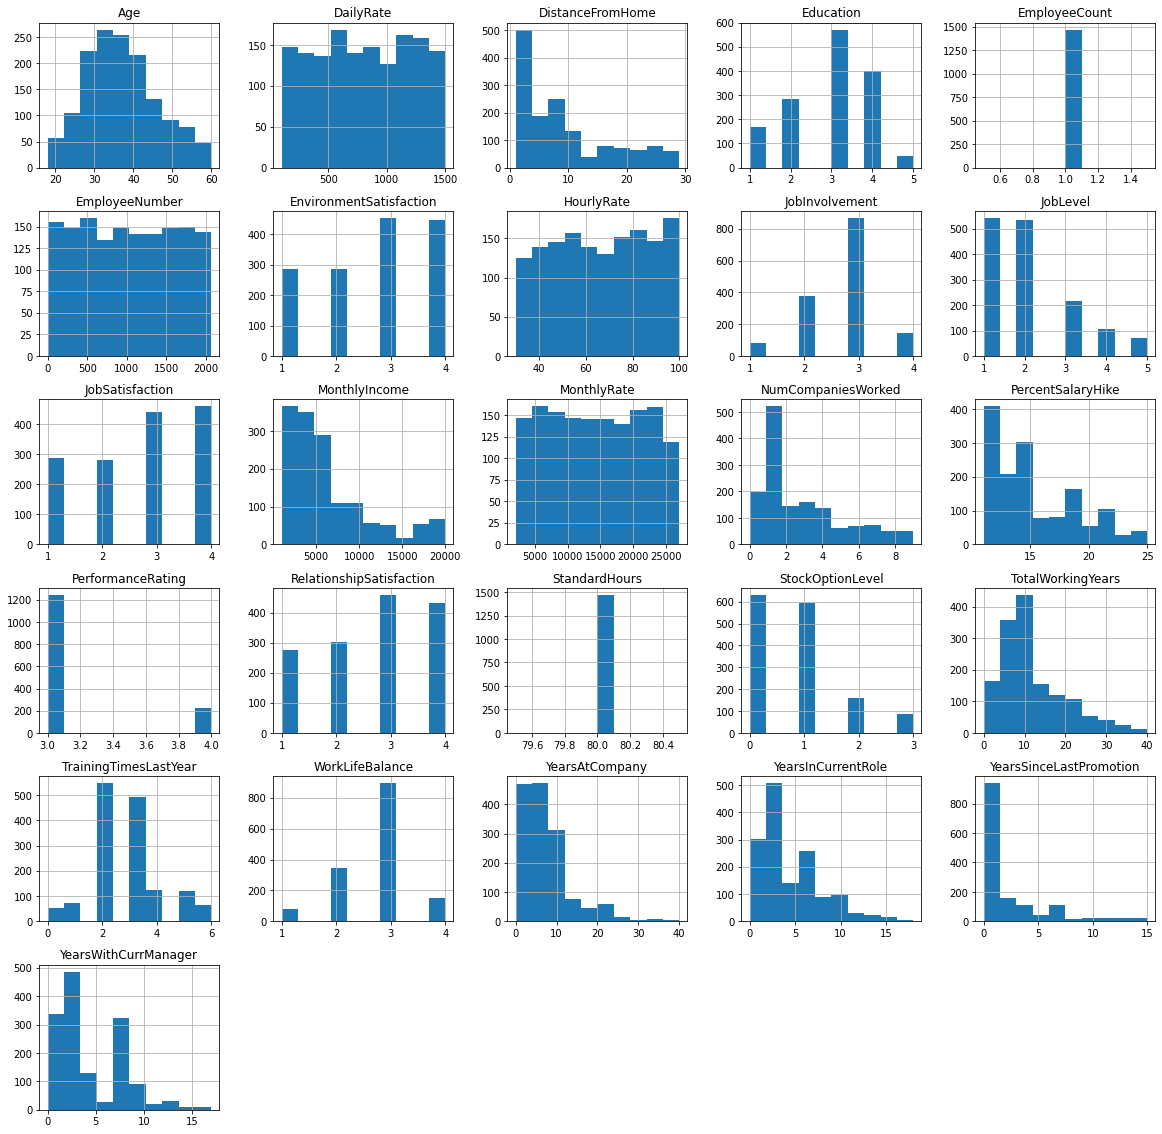

In [4]:

data_attrition.hist(figsize=(20,20));

In [5]:
data_attrition['Over18'].unique()

array(['Y'], dtype=object)

In [6]:
# There are columns that are redudant data and can be removed.
data_attrition = data_attrition.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber', 'JobLevel', 'YearsWithCurrManager', 'NumCompaniesWorked', 'HourlyRate'], axis=1)


In [7]:
# Encoding data
data_attrition['Attrition_Encoded'] = data_attrition['Attrition'].map({'Yes': 1, 'No': 0})
data_attrition['Attrition'].unique()
data_attrition['OverTime'] = data_attrition['OverTime'].map({'Yes': 1, 'No': 0})
data_attrition['OverTime'].unique()
data_attrition['BusinessTravel'] = data_attrition['BusinessTravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})
data_attrition['OverTime'].value_counts()

0    1054
1     416
Name: OverTime, dtype: int64

No     1233
Yes     237
Name: Attrition, dtype: int64

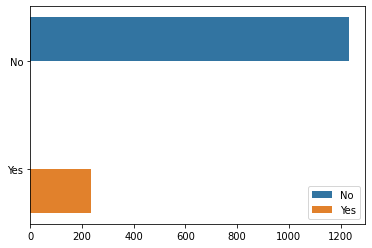

In [8]:

counts = data_attrition["Attrition"].value_counts()
# counter = data_attrition.groupby('Attrition_Encoded')['Attrition_Encoded'].sum()
sns.barplot(x=counts.values, y=counts.index ,   linewidth=.5, hue=counts.index)

counts

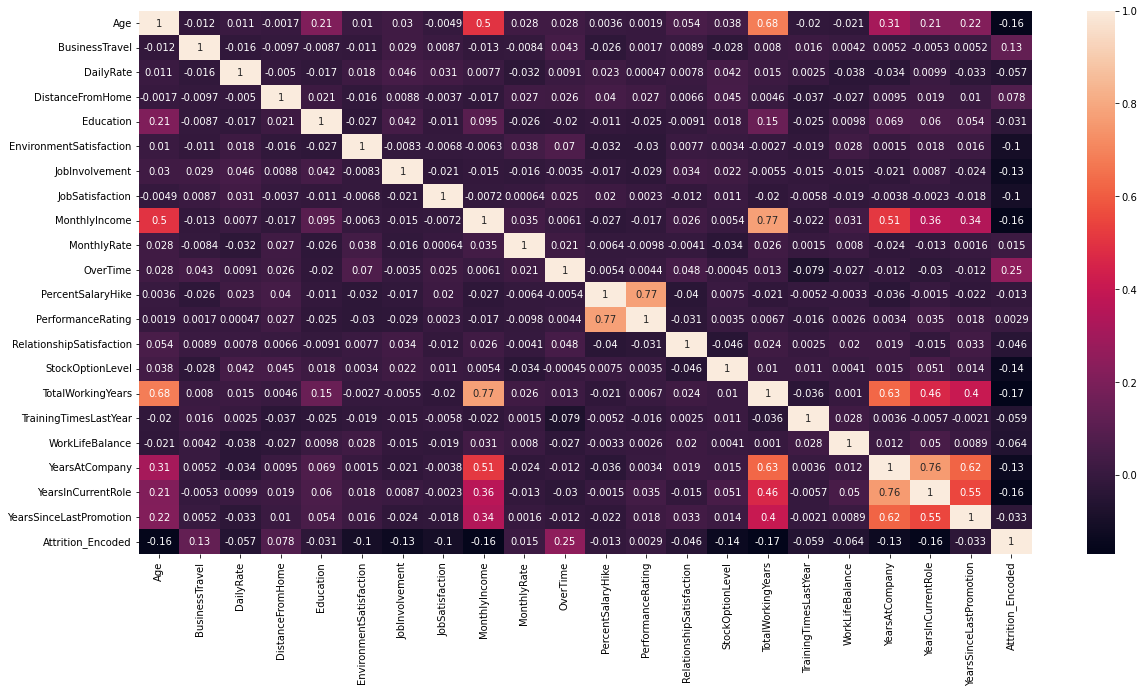

In [9]:
plt.subplots(figsize=(20, 10))
sns.heatmap(data_attrition.corr(), annot=True);

<AxesSubplot:xlabel='Age', ylabel='Count'>

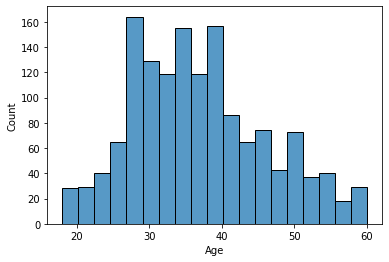

In [10]:
sns.histplot(data_attrition['Age'] )

In [11]:
gender_count = data_attrition.groupby('Gender')['Gender'].count()

In [12]:
data_attrition.groupby('Gender')['Age'].mean()

Gender
Female    37.329932
Male      36.653061
Name: Age, dtype: float64

In [13]:
gender_filter = data_attrition.groupby('Gender').agg({'MonthlyIncome': 'mean'})

gender_counter = data_attrition.groupby('Gender').agg({'Attrition':'count'})
gender_counter 


pd.crosstab(data_attrition['Gender'], data_attrition['Attrition'])
gender_filter

,MonthlyIncome
Gender,
Female,6686.566327
Male,6380.507937


In [14]:
# plt.title('Género vs. Deserción laboral')
counts = data_attrition.groupby(['Gender','Attrition']).agg({'Attrition': 'count'})
# plt.bar(counts.index, counts.values)
# plt.show()
counts

Attrition
Gender Attrition           
Female No               501
       Yes               87
Male   No               732
       Yes              150

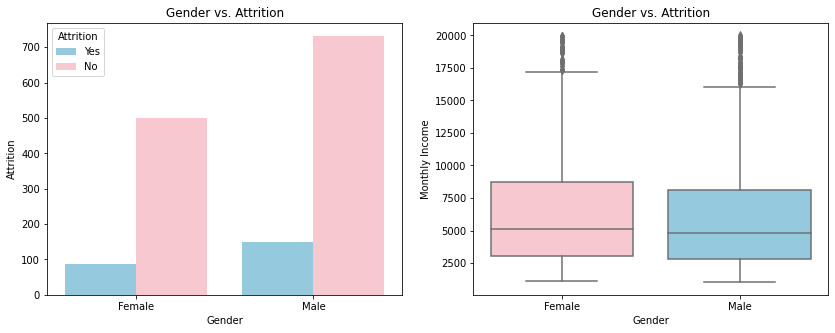

In [15]:
fig, (g_attrition, g_income) = plt.subplots(1,2 , figsize=(14,5))
                    
g_attrition.set_title('Gender vs. Attrition')
sns.countplot(x=data_attrition['Gender'], hue=data_attrition['Attrition'] , palette=['skyblue','pink'], ax=g_attrition)
g_attrition.set(ylabel='Attrition', xlabel='Gender')
 
g_income.set_title('Gender vs. Attrition')
sns.boxplot(x=data_attrition['Gender'], y=data_attrition['MonthlyIncome'], palette=['pink','skyblue'], ax=g_income)
g_income.set(ylabel='Monthly Income',  xlabel='Gender')
plt.show()




In [16]:
g_attrition.set_title('Gender vs. Attrition')
sns.countplot(x=data['Gender'], hue=data_attrition['Attrition'] , palette=['pink','skyblue'], ax=g_attrition)
g_attrition.set(ylabel='Attrition', xlabel='Gender')
data_attrition.groupby('Department')['Department'].count()


Department
Human Resources            63
Research & Development    961
Sales                     446
Name: Department, dtype: int64

In [17]:
pd.crosstab(data_attrition['Department'], data_attrition['Attrition'])


Attrition,No,Yes
Department,,
Human Resources,51,12
Research & Development,828,133
Sales,354,92


In [42]:
    data[data['JobRole']=='Sales Representative']['JobLevel'].value_counts()

1    76
2     7
Name: JobLevel, dtype: int64

In [19]:
pd.crosstab(data['JobRole'], data['Department'])
# pd.crosstab(data['MaritalStatus'], data['Attrition'])
data_attrition.groupby(['Department', 'JobRole']).agg({'Attrition_Encoded': 'sum'})

Attrition_Encoded
Department             JobRole                                     
Human Resources        Human Resources                           12
                       Manager                                    0
Research & Development Healthcare Representative                  9
                       Laboratory Technician                     62
                       Manager                                    3
                       Manufacturing Director                    10
                       Research Director                          2
                       Research Scientist                        47
Sales                  Manager                                    2
                       Sales Executive                           57
                       Sales Representative                      33

In [20]:
pd.crosstab(data['MaritalStatus'], data['Attrition'])


Attrition,No,Yes
MaritalStatus,,
Divorced,294,33
Married,589,84
Single,350,120


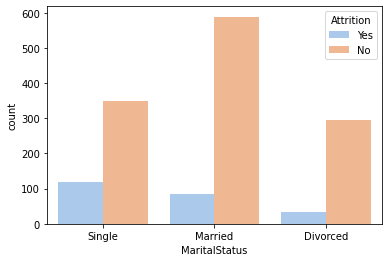

In [21]:
sns.countplot(x=data['MaritalStatus'], hue=data['Attrition'] , palette='pastel');

MaritalStatus  Divorced  Married  Single
Attrition                               
No                  294      589     350
Yes                  33       84     120


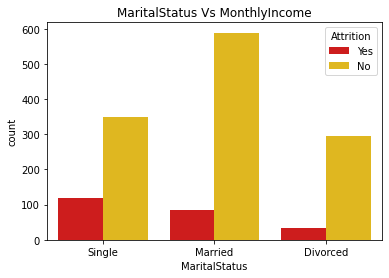

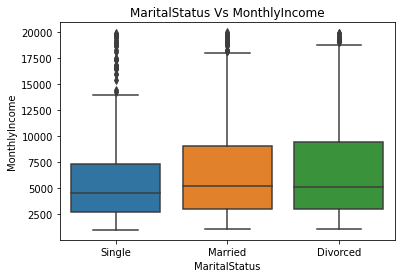

In [22]:
print(pd.crosstab(data_attrition['Attrition'],data_attrition['MaritalStatus']))


plt.title('MaritalStatus Vs MonthlyIncome')
sns.countplot(x=data_attrition['MaritalStatus'],hue=data_attrition['Attrition'],palette='hot')
plt.show();

plt.title('MaritalStatus Vs MonthlyIncome')
sns.boxplot(x=data_attrition['MaritalStatus'],y=data_attrition['MonthlyIncome'])
plt.show();

In [23]:
pd.crosstab(data_attrition['Attrition'], data_attrition['YearsAtCompany'])

YearsAtCompany,0,1,2,3,4,5,6,7,8,9,...,27,29,30,31,32,33,34,36,37,40
Attrition,,,,,,,,,,,,,,,,,,,,,
No,28,112,100,108,91,175,67,79,71,74,...,2,2,1,2,2,4,1,2,1,0
Yes,16,59,27,20,19,21,9,11,9,8,...,0,0,0,1,1,1,0,0,0,1


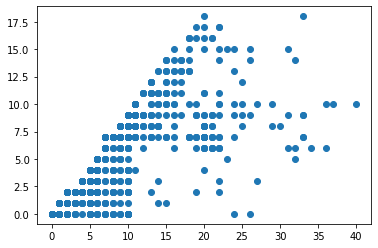

In [24]:
plt.scatter(x=data_attrition['YearsAtCompany'], y=data_attrition['YearsInCurrentRole'])

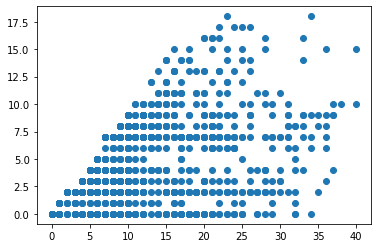

In [25]:
plt.scatter(x=data_attrition['TotalWorkingYears'], y=data_attrition['YearsInCurrentRole'])

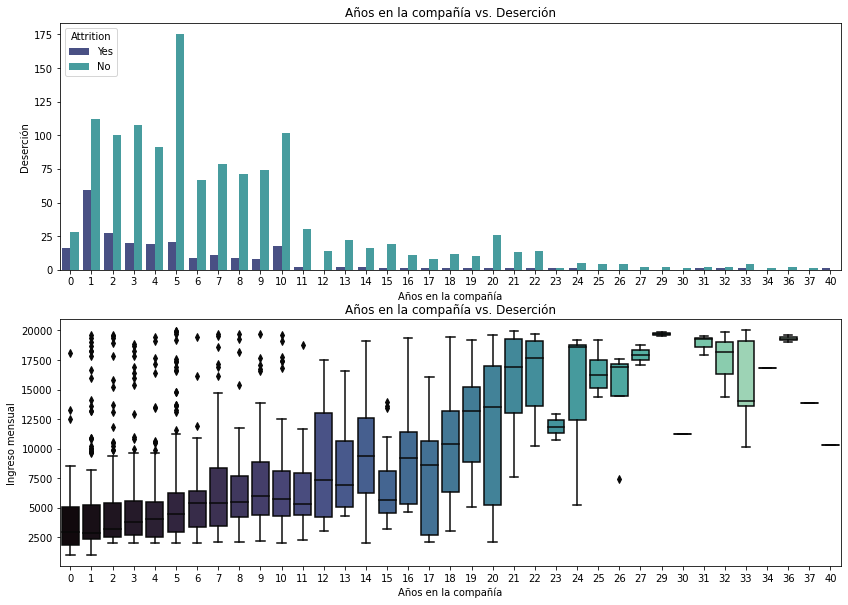

In [26]:
fig, (y_attrition, y_income) = plt.subplots(2,1 , figsize=(14,10))
                    
y_attrition.set_title('Años en la compañía vs. Deserción')
sns.countplot(x=data_attrition['YearsAtCompany'], hue=data_attrition['Attrition'] , palette="mako", ax=y_attrition)
y_attrition.set(ylabel='Deserción', xlabel='Años en la compañía')
y_income.set_title('Años en la compañía vs. Deserción')
sns.boxplot(x=data_attrition['YearsAtCompany'], y=data_attrition['MonthlyIncome'], palette='mako', ax=y_income)
y_income.set(ylabel='Ingreso mensual',  xlabel='Años en la compañía')
plt.show()

In [27]:
employees_year_company = (data_attrition['YearsAtCompany'].value_counts(normalize=True) * 100).sort_index()
employees_year_company.head(10).sum()

75.10204081632652

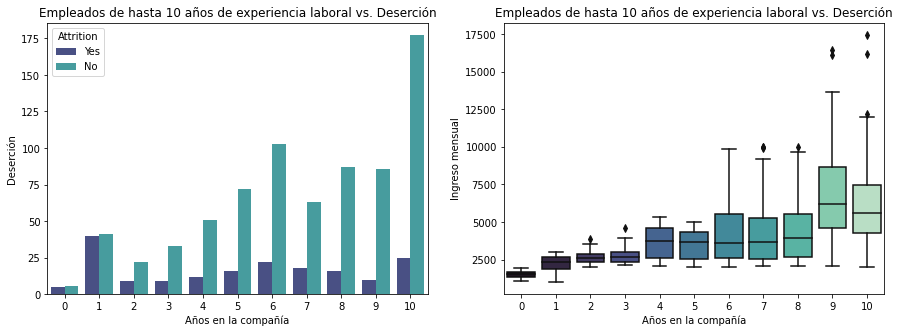

In [28]:
ten_year_employees = data_attrition [data_attrition['TotalWorkingYears'] <= 10]
ten_year_employees
fig, (y_attrition, y_income) = plt.subplots(1,2 , figsize=(15,5))
                    
y_attrition.set_title('Empleados de hasta 10 años de experiencia laboral vs. Deserción')
sns.countplot(x=ten_year_employees['TotalWorkingYears'], hue=ten_year_employees['Attrition'] , palette="mako", ax=y_attrition)
y_attrition.set(ylabel='Deserción', xlabel='Años en la compañía')
y_income.set_title('Empleados de hasta 10 años de experiencia laboral vs. Deserción')
sns.boxplot(x=ten_year_employees['TotalWorkingYears'], y=ten_year_employees['MonthlyIncome'], palette='mako', ax=y_income)
y_income.set(ylabel='Ingreso mensual',  xlabel='Años en la compañía')
plt.show()

In [29]:
experienced_employees = data_attrition['TotalWorkingYears'].value_counts(normalize=True).sort_index() * 100
experienced_employees.sum()

100.0

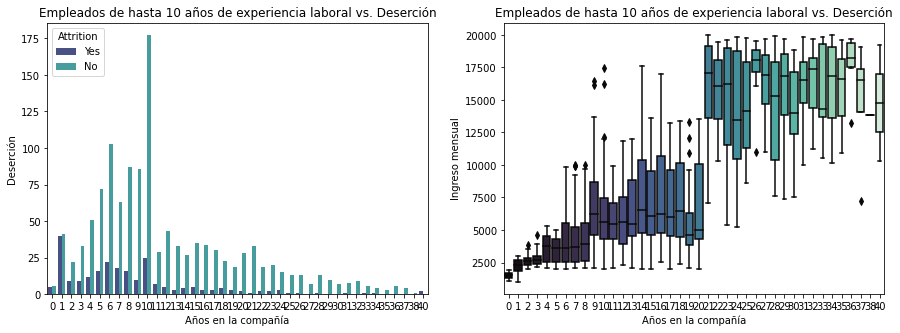

In [30]:
ten_year_employees = data_attrition [data_attrition['TotalWorkingYears'] <= 10]
ten_year_employees
fig, (y_attrition, y_income) = plt.subplots(1,2 , figsize=(15,5))
                    
y_attrition.set_title('Empleados de hasta 10 años de experiencia laboral vs. Deserción')
sns.countplot(x=data_attrition['TotalWorkingYears'], hue=data_attrition['Attrition'] , palette="mako", ax=y_attrition)
y_attrition.set(ylabel='Deserción', xlabel='Años en la compañía')
y_income.set_title('Empleados de hasta 10 años de experiencia laboral vs. Deserción')
sns.boxplot(x=data_attrition['TotalWorkingYears'], y=data_attrition['MonthlyIncome'], palette='mako', ax=y_income)
y_income.set(ylabel='Ingreso mensual',  xlabel='Años en la compañía')
plt.show()

In [31]:
data_attrition.to_csv('dataset_cleaned.csv')